# **Aquisição, Processamento e Exploração de Dados**

## Atividade Final

**Equipe 1:** Adiel Silva, Franklin Perseu, Felipe Guimarães, William Affonso

# **Predefinições**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
from scipy.stats import chi2_contingency
import itertools as it

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls '/content/drive/Shared drives/Trabalho/APE/sp_bo_data'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 Atividade-Final-Bruto.ipynb	 BO_2010_2.csv	 BO_2016.csv
 Atividade-Final.ipynb		 BO_2011_1.csv	'Perguntas de Negócio.gdoc'
 Atividade-Final-WILLIAM.ipynb	 BO_2011_2.csv	 RDO_1.csv
 BO_2007_1.csv			 BO_2012_1.csv	 RDO_2.csv
 BO_2007_2.csv			 BO_2012_2.csv	 RDO_3.csv
 BO_2008_1.csv			 BO_2013_1.csv	 RDO_column_description.csv
 BO_2008_2.csv			 BO_2013_2.csv	 RDO_column_description.gsheet
 BO_2009_1.csv			 BO_2014_1.csv	 RDO_methodology.txt
 BO_2009_2.csv			 BO_2014_2.csv
 BO_2010_1.csv			 BO_2015.csv


# **Carregamento e Integração dos Dados**

In [ ]:
RDO_1 = pd.read_csv('/content/drive/Shared drives/Trabalho/APE/sp_bo_data/RDO_1.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
RDO_2 = pd.read_csv('/content/drive/Shared drives/Trabalho/APE/sp_bo_data/RDO_2.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
RDO_3 = pd.read_csv('/content/drive/Shared drives/Trabalho/APE/sp_bo_data/RDO_3.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
df_descri = pd.read_csv('/content/drive/Shareddrives/Trabalho/APE/sp_bo_data/RDO_column_description.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,23,24,28,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## **Verificação das Colunas**

In [ ]:
# Todas as fontes de dados tem as mesmas colunas?

print(RDO_1.columns)
print(RDO_2.columns)
print(RDO_3.columns)
print("######## Comparando os tipos RDO_1 e RDO_2 ########\n" + str(RDO_1.dtypes == RDO_2.dtypes))
print("######## Comparando os tipos RDO_2 e RDO_3 ########\n" + str(RDO_2.dtypes == RDO_3.dtypes))

Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'CIDADE', 'ANO_BO', 'NUM_BO', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'NOME_MUNICIPIO_CIRC',
       'DESCR_TIPO_BO', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO',
       'DATAHORA_COMUNICACAO_BO', 'FLAG_STATUS', 'RUBRICA', 'DESCR_CONDUTA',
       'DESDOBRAMENTO', 'DESCR_TIPOLOCAL', 'DESCR_SUBTIPOLOCAL', 'LOGRADOURO',
       'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'DESCR_TIPO_PESSOA',
       'FLAG_VITIMA_FATAL', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR_CUTIS',
       'Unnamed: 30'],
      dtype='object')
Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'CIDADE', 'ANO_BO', 'NUM_BO', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'NOME_MUNICIPIO_CIRC',
       'DESCR_TIPO_BO', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA_BO',
       'DATAHORA_COMUNICACAO_BO', 'FLAG_STATUS', 'RUBRICA', 'DESCR_CONDUTA',
  

In [ ]:
df_descri

,Campos,Descrição
0,ID_DELEGACIA,Código da delegacia responsável pelo registro ...
1,NOME_DEPARTAMENTO,Departamento responsável pelo registro
2,NOME_SECCIONAL,Delegacia Seccional responsável pelo registro
3,NOME_DELEGACIA,Delegacia responsável pelo registro
4,CIDADE,Cidade de Registro
5,ANO_BO,Ano da ocorrencia
6,NUM_BO,Número do BO
7,NOME_DEPARTAMENTO_CIRC,Departamento de Circunscrição
8,NOME_SECCIONAL_CIRC,Seccional de Circunscrição
9,NOME_DELEGACIA_CIRC,Delegacia de Circunscrição


In [ ]:
frames = [RDO_1, RDO_2, RDO_3]

RDO = pd.concat(frames)

In [ ]:
del (RDO_1, RDO_2, RDO_3)

In [ ]:
RDO.shape

(2395054, 31)

#**Processamento**

---



In [ ]:
# Remove espaços em branco dos atributos categóricos
RDO = RDO.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [ ]:
# Remove atributos com muitos dados nulos ou que não tem relevância dentro para as perguntas que buscamos responder
RDO.drop(['NOME_DEPARTAMENTO_CIRC','NOME_MUNICIPIO_CIRC','DATAHORA_COMUNICACAO_BO','LOGRADOURO','NUMERO_LOGRADOURO','LATITUDE','LONGITUDE','IDADE_PESSOA','Unnamed: 30'], axis=1, inplace=True)
RDO.drop(['NOME_DELEGACIA','ANO_BO'], axis=1, inplace=True)
RDO.shape

(2395054, 20)

In [ ]:
# Verifica nomes semelhantes na coluna CIDADE
RDO['CIDADE'].value_counts()

S.PAULO                2392307
Sao Paulo                 1676
OSASCO                     169
GUARULHOS                  152
DIADEMA                    145
                        ...   
BASTOS                       1
LEME                         1
ATIBAIA                      1
PRESIDENTE PRUDENTE          1
PACAEMBU                     1
Name: CIDADE, Length: 97, dtype: int64

In [ ]:
# Trata nomes diferentes para a instância 'S.PAULO' no dataset CIDADE
RDO['CIDADE'] = RDO['CIDADE'].replace(['Sao Paulo'],'S.PAULO')
RDO['CIDADE'].value_counts()

S.PAULO                 2393983
OSASCO                      169
GUARULHOS                   152
DIADEMA                     145
ITAPECERICA DA SERRA         73
                         ...   
BASTOS                        1
LEME                          1
ATIBAIA                       1
PRESIDENTE PRUDENTE           1
PACAEMBU                      1
Name: CIDADE, Length: 96, dtype: int64

##**Tratamento dos tipos**

In [ ]:
# verificar tipos das colunas RDO
RDO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2395054 entries, 0 to 553428
Data columns (total 20 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ID_DELEGACIA         int64 
 1   NOME_DEPARTAMENTO    object
 2   NOME_SECCIONAL       object
 3   CIDADE               object
 4   NUM_BO               int64 
 5   NOME_SECCIONAL_CIRC  object
 6   NOME_DELEGACIA_CIRC  object
 7   DESCR_TIPO_BO        object
 8   DATA_OCORRENCIA_BO   object
 9   HORA_OCORRENCIA_BO   object
 10  FLAG_STATUS          object
 11  RUBRICA              object
 12  DESCR_CONDUTA        object
 13  DESDOBRAMENTO        object
 14  DESCR_TIPOLOCAL      object
 15  DESCR_SUBTIPOLOCAL   object
 16  DESCR_TIPO_PESSOA    object
 17  FLAG_VITIMA_FATAL    object
 18  SEXO_PESSOA          object
 19  COR_CUTIS            object
dtypes: int64(2), object(18)
memory usage: 383.7+ MB


In [ ]:
# converter DATA_OCORRENCIA_BO para o tipo datetime
datas = pd.Series([datetime.strptime(data, '%d/%m/%Y') for data in RDO.DATA_OCORRENCIA_BO], index=RDO.index)
RDO = RDO.assign(DATA_OCORRENCIA_BO = datas)

In [ ]:
# categorizar HORA_OCORRENCIA_BO
# trocar H por ':'
RDO['HORA_OCORRENCIA_BO'] = RDO['HORA_OCORRENCIA_BO'].str.replace('H',':')

# remover registro que não contenha ':'
RDO['HORA_OCORRENCIA_BO'] = np.where(RDO['HORA_OCORRENCIA_BO'].str.find(':')!= -1, RDO['HORA_OCORRENCIA_BO'], False)
RDO.drop(RDO[RDO['HORA_OCORRENCIA_BO'] == False].index, inplace=True)

# converter HORA_OCORRENCIA_BO para o tipo datetime
horas = pd.Series([(datetime.strptime(str(hora),'%H:%M') \
                    if not pd.isna(hora) else hora) \
                   for hora in RDO.HORA_OCORRENCIA_BO], index = RDO.index)

# ------ Categorias: [00:00, 01:00, 02:00, 03:00, 04:0, 05:00, 06:00, 07:00, 08:00, 09:00, 10:00, 11:00,
#                      12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00, 
#                       NR - Não Registrado]
# --> dados nulos tratados como categoria 'NR - Não Registrado'
horasSeries = pd.Series([ (hora.strftime('%H:00') \
 if not pd.isna(hora) else 'NR - Não Registrado') for hora in horas ], index = RDO.index)

RDO = RDO.assign(HORA_OCORRENCIA_BO = horasSeries)

Text(0.5, 1.02, 'Horários com mais ocorrências registradas')

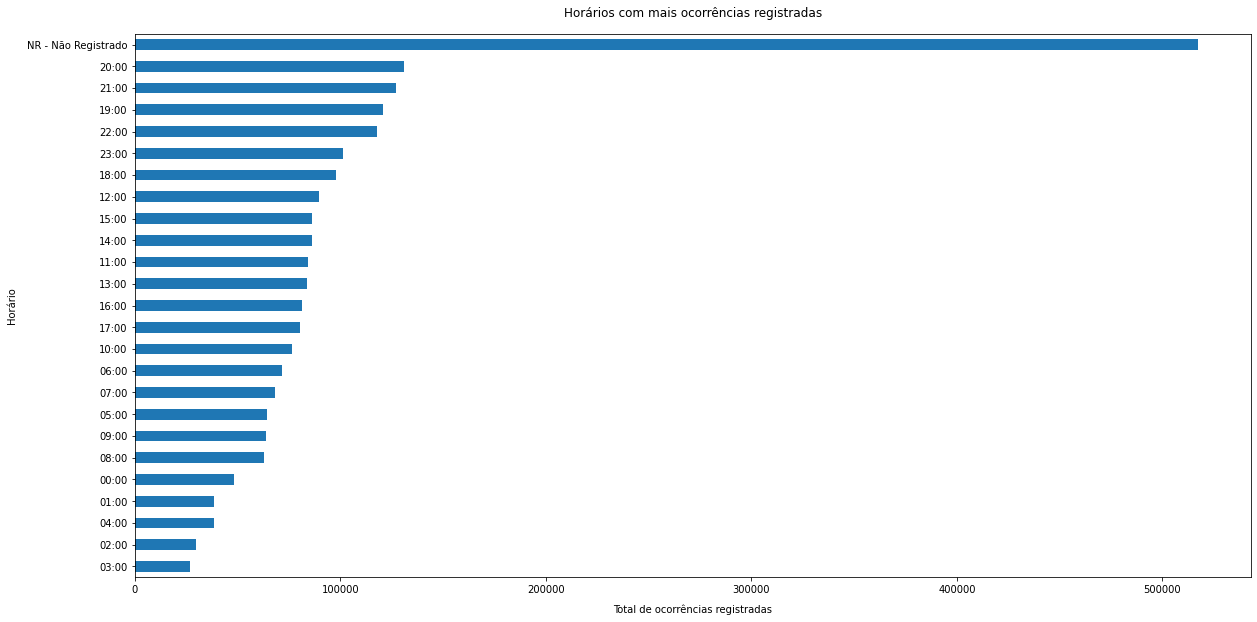

In [ ]:
# Quais os horários que tem mais ocorrências registradas
RDO.HORA_OCORRENCIA_BO.value_counts().sort_values().plot(kind='barh',figsize=(20, 10))
plt.ylabel("Horário", labelpad=10)
plt.xlabel("Total de ocorrências registradas", labelpad=10)
plt.title("Horários com mais ocorrências registradas", y=1.02)

In [ ]:
# AVALIAR correlação entre atributo 'HORA_OCORRENCIA_BO' e demais atributos

# função para calcular coeficiente de correlação entre variáveis categóricas
def cramers_corrected_stat(confusion_matrix):
  """ calculate Cramers V statistic for categorical-categorical association."""

  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1)/(n-1)))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
  
# guardar em lista apenas as colunas categóricas
cols = RDO.select_dtypes(exclude = 'int64').columns

# selecionar apenas linhas sem 'HORA_OCORRENCIA_BO' nula
rdo_hora_complete = RDO[RDO.HORA_OCORRENCIA_BO != 'NR - Não Registrado']

# criar dataframe com dados sobre dependência e correlação para dados completos e incompletos
data = []
for x, y in it.combinations(cols, 2):
  if (x == 'HORA_OCORRENCIA_BO' or y == 'HORA_OCORRENCIA_BO'):
    conf_matrix_complete = pd.crosstab(rdo_hora_complete[x],rdo_hora_complete[y])
    conf_matrix_incomplete = pd.crosstab(RDO[x],RDO[y])
    data.append([x,y,cramers_corrected_stat(conf_matrix_complete),cramers_corrected_stat(conf_matrix_incomplete)])

# avalia dependência e correlação entre 'HORA_OCORRÊNCIA_BO' e demais atributos
pd.DataFrame(data=data, columns=['Column','Compared With','Cramer\'s V Complete','Cramer\'s V Incomplete'])

,Column,Compared With,Cramer's V Complete,Cramer's V Incomplete
0,NOME_DEPARTAMENTO,HORA_OCORRENCIA_BO,0.020947,0.139959
1,NOME_SECCIONAL,HORA_OCORRENCIA_BO,0.026124,0.125791
2,CIDADE,HORA_OCORRENCIA_BO,0.004192,0.002653
3,NOME_SECCIONAL_CIRC,HORA_OCORRENCIA_BO,0.036658,0.048622
4,NOME_DELEGACIA_CIRC,HORA_OCORRENCIA_BO,0.036218,0.042114
5,DESCR_TIPO_BO,HORA_OCORRENCIA_BO,0.023665,0.046494
6,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,0.051513,0.073086
7,HORA_OCORRENCIA_BO,FLAG_STATUS,0.033282,0.047773
8,HORA_OCORRENCIA_BO,RUBRICA,0.053576,0.101850
9,HORA_OCORRENCIA_BO,DESCR_CONDUTA,0.068023,0.086250


In [ ]:
# remover coluna 'DESDOBRAMENTO' (+90% de dados nulos, sem valor para as questões que buscamos responder)
RDO.drop(columns = 'DESDOBRAMENTO')

,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,CIDADE,NUM_BO,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,DESCR_TIPO_BO,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,FLAG_STATUS,RUBRICA,DESCR_CONDUTA,DESCR_TIPOLOCAL,DESCR_SUBTIPOLOCAL,DESCR_TIPO_PESSOA,FLAG_VITIMA_FATAL,SEXO_PESSOA,COR_CUTIS
0,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,S.PAULO,12,DEL.SEC.1º CENTRO,05º D.P. ACLIMACAO,Boletim de Ocorrência,2010-01-01,04:00,Consumado,Lesão corporal (art. 129),NaN,Terminal/Estação,Metrov. e ferroviário metrop.-acesso/escada/el...,Vítima,NaN,M,Preta
1,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,S.PAULO,23,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,Boletim de Ocorrência,2010-01-04,19:00,Consumado,Lesão corporal culposa (art. 129. §6o.),NaN,Terminal/Estação,Metrov. e ferroviário metrop.-Embarque,Vítima,NaN,F,Parda
2,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,S.PAULO,24,DEL.SEC.3º OESTE,37º D.P. CAMPO LIMPO,Boletim de Ocorrência,2010-01-05,00:00,Consumado,Lesão corporal (art. 129),NaN,Terminal/Estação,Metrov. e ferroviário metrop.-outros,Vítima,NaN,M,Branca
3,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,S.PAULO,31,DEL.SEC.3º OESTE,23º D.P. PERDIZES,Boletim de Ocorrência,2010-01-05,18:00,Consumado,Furto (art. 155),TRANSEUNTE,Terminal/Estação,Metrov. e ferroviário metrop.-Embarque,Vítima,NaN,M,Branca
4,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,S.PAULO,40,DEL.SEC.1º CENTRO,78º D.P. JARDINS,Boletim de Ocorrência,2010-01-06,19:00,Consumado,"Furto qualificado (art. 155, §4o.)",INTERIOR TRANSPORTE COLETIVO,Terminal/Estação,Metrov. e ferroviário metrop.-vagão,Vítima,NaN,F,Parda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553424,990900,DECAP,DEL.SEC.1º CENTRO,S.PAULO,309,DEL.SEC.2º SUL,35º D.P. JABAQUARA,Boletim de Ocorrência,2016-10-21,NR - Não Registrado,Consumado,Roubo (art. 157),TRANSEUNTE,Via pública,Via pública,Vítima,NaN,M,Parda
553425,990900,DECAP,DEL.SEC.1º CENTRO,S.PAULO,313,DEL.SEC.4º NORTE,28º D.P. FREGUESIA DO O,Boletim de Ocorrência,2016-10-11,NR - Não Registrado,Consumado,Furto (art. 155),INTERIOR ESTABELECIMENTO,Restaurante e afins,Restaurante-Salão,Vítima,NaN,F,Branca
553426,990900,DECAP,DEL.SEC.1º CENTRO,S.PAULO,348,DEL.SEC.4º NORTE,09º D.P. - CARANDIRU,Boletim de Ocorrência,2016-11-25,NR - Não Registrado,Consumado,Furto (art. 155),OUTROS,Terminal/Estação,Onibus/Lotação/Trolebus-ônibus,Vítima,NaN,M,Parda
553427,990900,DECAP,DEL.SEC.1º CENTRO,S.PAULO,353,DEL.SEC.6º SANTO AMARO,11º D.P. SANTO AMARO,Boletim de Ocorrência,2016-11-25,NR - Não Registrado,Consumado,Furto (art. 155),ESTABELECIMENTO ENSINO,Estabelecimento de ensino,Outros,Vítima,NaN,M,Parda


In [ ]:
RDO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2395051 entries, 0 to 553428
Data columns (total 20 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ID_DELEGACIA         int64         
 1   NOME_DEPARTAMENTO    object        
 2   NOME_SECCIONAL       object        
 3   CIDADE               object        
 4   NUM_BO               int64         
 5   NOME_SECCIONAL_CIRC  object        
 6   NOME_DELEGACIA_CIRC  object        
 7   DESCR_TIPO_BO        object        
 8   DATA_OCORRENCIA_BO   datetime64[ns]
 9   HORA_OCORRENCIA_BO   object        
 10  FLAG_STATUS          object        
 11  RUBRICA              object        
 12  DESCR_CONDUTA        object        
 13  DESDOBRAMENTO        object        
 14  DESCR_TIPOLOCAL      object        
 15  DESCR_SUBTIPOLOCAL   object        
 16  DESCR_TIPO_PESSOA    object        
 17  FLAG_VITIMA_FATAL    object        
 18  SEXO_PESSOA          object        
 19  COR_CUTIS            o

In [ ]:
RDO['DESCR_TIPO_PESSOA'].value_counts()

Vítima                 2324861
Autor/Vitima             50824
Adolescente              13903
Criança                   4120
Adolescente Inf/Vit        568
Encontrado                 327
Desaparecido               249
Vítima de Suicídio          53
-46.59262144                 3
-46.50190039                 2
-46.73206178                 1
-46.74609038                 1
-46.71689195                 1
-46.4775127                  1
-46.64041038                 1
-46.65601203                 1
-46.67749205                 1
-46.56943933                 1
-46.47718973                 1
-46.65683035                 1
-46.7071346                  1
-46.65744418                 1
-46.71465992                 1
-46.44564819                 1
-46.60337333                 1
-46.64324692                 1
-46.64845277                 1
-46.58629385                 1
-46.40819689                 1
-46.69280304                 1
-46.61676681                 1
-46.63330717                 1
-46.7355

In [ ]:
X = RDO['DESCR_TIPO_PESSOA']
X.isnull().sum()

98

In [ ]:
RDO['DESCR_TIPO_PESSOA']=RDO['DESCR_TIPO_PESSOA'].replace([r'-\d.*'],"Outros", regex=True)

In [ ]:
RDO['DESCR_TIPO_PESSOA'].value_counts()

Vítima                 2324861
Autor/Vitima             50824
Adolescente              13903
Criança                   4120
Adolescente Inf/Vit        568
Encontrado                 327
Desaparecido               249
Vítima de Suicídio          53
Name: DESCR_TIPO_PESSOA, dtype: int64

In [ ]:
RDO['DESCR_TIPO_PESSOA'].unique()

array(['Vítima', 'Criança', 'Adolescente', 'Autor/Vitima', nan,
       'Desaparecido', 'Encontrado', 'Adolescente Inf/Vit',
       'Vítima de Suicídio'], dtype=object)

In [ ]:
RDO['FLAG_VITIMA_FATAL'].value_counts()

N         83736
S          7508
            155
Vítima      141
Name: FLAG_VITIMA_FATAL, dtype: int64

In [ ]:
RDO['FLAG_VITIMA_FATAL'] = RDO['FLAG_VITIMA_FATAL'].replace([r'','Vítima'], 'nao declarado', regex=True)

In [ ]:
RDO['FLAG_VITIMA_FATAL'].value_counts()

N                83736
S                 7508
nao declarado      296
Name: FLAG_VITIMA_FATAL, dtype: int64

In [ ]:
RDO['SEXO_PESSOA'].value_counts()

M    1357741
F    1017414
I      19664
          86
N          1
Name: SEXO_PESSOA, dtype: int64

In [ ]:
RDO['SEXO_PESSOA'].isnull().sum()

145

In [ ]:
RDO['SEXO_PESSOA']= RDO['SEXO_PESSOA'].replace([r'','N'], "I", regex=True)


In [ ]:
RDO['SEXO_PESSOA'].value_counts()

M    1357741
F    1017414
I      19664
Name: SEXO_PESSOA, dtype: int64

In [ ]:
RDO['COR_CUTIS'].value_counts()

Branca      1371983
Parda        434414
Preta         80993
Outros        28030
Amarela       23198
Vermelha        723
25                9
34                8
24                8
32                7
27                6
21                5
26                5
40                5
28                5
38                5
18                5
44                4
29                4
19                4
37                4
30                4
53                4
33                3
51                3
42                3
22                3
55                2
39                2
41                2
61                2
43                2
47                2
20                2
64                2
46                2
48                1
59                1
35                1
52                1
58                1
82                1
95                1
79                1
31                1
57                1
56                1
83                1
8                 1
49                1


In [ ]:
RDO['COR_CUTIS'] = RDO['COR_CUTIS'].replace([r'\d'], 'Outros', regex=True)
RDO['COR_CUTIS'] = RDO['COR_CUTIS'].replace([r'OutrosOutros'], 'Outros', regex=True)
RDO['COR_CUTIS'].value_counts()

Branca      1371983
Parda        434414
Preta         80993
Outros        28169
Amarela       23198
Vermelha        723
Name: COR_CUTIS, dtype: int64

In [ ]:
RDO['RUBRICA'].unique()

array(['Lesão corporal (art. 129)',
       'Lesão corporal culposa (art. 129. §6o.)', 'Furto (art. 155)',
       'Furto qualificado (art. 155, §4o.)', 'Roubo (art. 157)',
       'Lesão corporal culposa na direção de veículo automotor (Art. 303)',
       'Estupro (art.213)', 'Lesão corporal (art 129 § 9º)',
       'Lesão corporal de natureza GRAVE (art. 129, §1o.)',
       'Homicídio simples (art. 121)',
       'Homicídio culposo (art. 121, §3o.)',
       'Homicídio culposo na direção de veículo automotor (Art. 302)',
       'Homicídio qualificado (art. 121, §2o.)',
       'Estupro de vulneravel (art.217-A)',
       "Lesão corporal  de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",
       'Furto de coisa comum (art. 156)',
       'Lesão corporal seguida de morte (art. 129, §3o.)',
       'A.I.-Estupro de vulneravel (art.217-A)',
       'A.I.-Lesão corporal (art. 129)', 'A.I.-Estupro (art.213)',
       'A.I.-Furto (art. 155)', 'A.I.-Roubo (art. 157)',
       'A.I.-Furto qualificado (art. 155, 

In [ ]:
RDO['RUBRICA']= RDO['RUBRICA'].str.replace('A.I.-','')

In [ ]:
# Crei 2 novas colunas, ARTIGO e PARAGRAFO baseado na coluna RUBRICA
import re
RDO['ARTIGO'] = np.where(len(RDO['RUBRICA'].str.extract('(\d+)')) > 2, RDO['RUBRICA'].str.extract('(\d+)'), '')
RDO['PARAGRAFO'] = RDO['RUBRICA'].str.extract(r'§\s*([^\.]*)\s*\.', expand=False)
agrupamento = RDO[['RUBRICA','ARTIGO','PARAGRAFO']].copy()

In [ ]:
X = agrupamento.groupby(['RUBRICA','ARTIGO','PARAGRAFO'], dropna=False)['RUBRICA'].count().to_frame(name = 'Qtde.').reset_index()
X.sort_values(by = ['ARTIGO','PARAGRAFO','Qtde.'], ascending=[True, True,False], inplace=True)
X.set_index('RUBRICA', inplace=True)
X

,ARTIGO,PARAGRAFO,Qtde.
RUBRICA,,,
"Homicídio qualificado (art. 121, §2o.)",121,2o,3538
"Homicídio culposo (art. 121, §3o.)",121,3o,366
Homicídio simples (art. 121),121,NaN,18403
"Lesão corporal de natureza GRAVE (art. 129, §1o.)",129,1o,822
"Lesão corporal de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",129,2o,130
"Lesão corporal seguida de morte (art. 129, §3o.)",129,3o,76
Lesão corporal culposa (art. 129. §6o.),129,6o,7087
Lesão corporal (art. 129),129,NaN,208656
Lesão corporal (art 129 § 9º),129,NaN,47625


In [ ]:
RDO['RUBRICA'].unique()

array(['Lesão corporal (art. 129)',
       'Lesão corporal culposa (art. 129. §6o.)', 'Furto (art. 155)',
       'Furto qualificado (art. 155, §4o.)', 'Roubo (art. 157)',
       'Lesão corporal culposa na direção de veículo automotor (Art. 303)',
       'Estupro (art.213)', 'Lesão corporal (art 129 § 9º)',
       'Lesão corporal de natureza GRAVE (art. 129, §1o.)',
       'Homicídio simples (art. 121)',
       'Homicídio culposo (art. 121, §3o.)',
       'Homicídio culposo na direção de veículo automotor (Art. 302)',
       'Homicídio qualificado (art. 121, §2o.)',
       'Estupro de vulneravel (art.217-A)',
       "Lesão corporal  de natureza 'GRAVÍSSIMA' (art. 129, §2o.)",
       'Furto de coisa comum (art. 156)',
       'Lesão corporal seguida de morte (art. 129, §3o.)'], dtype=object)

In [ ]:
RDO.drop(['DESCR_SUBTIPOLOCAL','DESDOBRAMENTO'], axis=1, inplace=True)

In [ ]:
RDO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2395051 entries, 0 to 553428
Data columns (total 20 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ID_DELEGACIA         int64         
 1   NOME_DEPARTAMENTO    object        
 2   NOME_SECCIONAL       object        
 3   CIDADE               object        
 4   NUM_BO               int64         
 5   NOME_SECCIONAL_CIRC  object        
 6   NOME_DELEGACIA_CIRC  object        
 7   DESCR_TIPO_BO        object        
 8   DATA_OCORRENCIA_BO   datetime64[ns]
 9   HORA_OCORRENCIA_BO   object        
 10  FLAG_STATUS          object        
 11  RUBRICA              object        
 12  DESCR_CONDUTA        object        
 13  DESCR_TIPOLOCAL      object        
 14  DESCR_TIPO_PESSOA    object        
 15  FLAG_VITIMA_FATAL    object        
 16  SEXO_PESSOA          object        
 17  COR_CUTIS            object        
 18  ARTIGO               object        
 19  PARAGRAFO            o

#  Perguntas

Quantidade de ocorrências por Homicídios por ano no estado de S.Paulo?

In [ ]:
df2 = RDO[RDO['RUBRICA'].str.contains("Homicídio")]

In [ ]:
df2['ANO'] = df2['DATA_OCORRENCIA_BO'].dt.year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show>

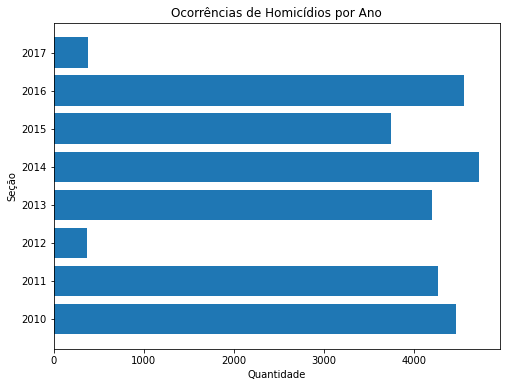

In [ ]:
quant = df2['ANO']
quant_soma = quant.value_counts()

quant_soma = quant_soma.sort_values()
x = quant_soma.index
y = quant_soma


plt.figure(figsize = (8,6))

plt.barh(x,y)

plt.title("Ocorrências de Homicídios por Ano")
plt.xlabel("Quantidade")
plt.ylabel("Seção")

plt.show

##Gráficos com informações adicionais

<function matplotlib.pyplot.show>

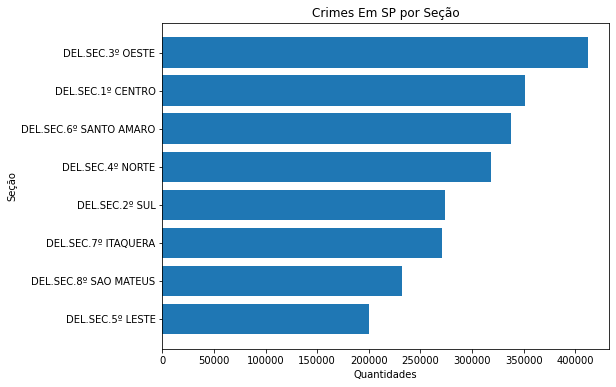

In [ ]:
crime = RDO['NOME_SECCIONAL_CIRC']
crime_soma = crime.value_counts()

crime_soma = crime_soma.sort_values()
x = crime_soma.index
y = crime_soma


plt.figure(figsize = (8,6))

plt.barh(x,y)

plt.title("Crimes Em SP por Seção")
plt.xlabel("Quantidades")
plt.ylabel("Seção")
#plt.xticks(x)
plt.show

<function matplotlib.pyplot.show>

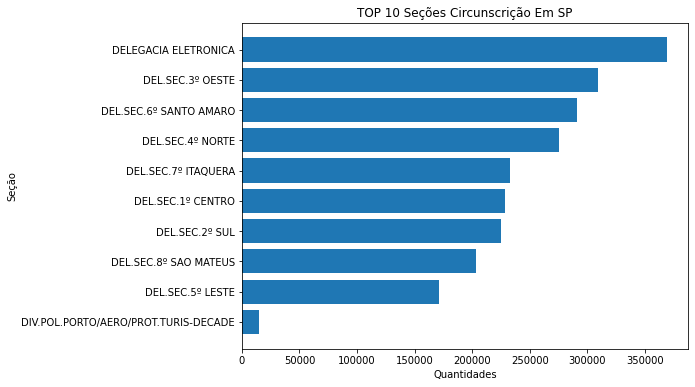

In [ ]:
crime = RDO['NOME_SECCIONAL']
crime_soma = crime.value_counts()

crime_soma = crime_soma.sort_values()
x = crime_soma.index[-10:]

y = crime_soma[-10:]


plt.figure(figsize = (8,6))

plt.barh(x,y)

plt.title("TOP 10 Seções Circunscrição Em SP")
plt.xlabel("Quantidades")
plt.ylabel("Seção")
#plt.xticks(x)
plt.show

<function matplotlib.pyplot.show>

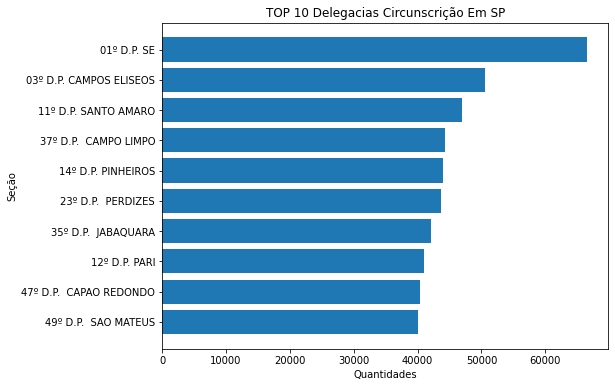

In [ ]:
crime = RDO['NOME_DELEGACIA_CIRC']
crime_soma = crime.value_counts()


crime_soma = crime_soma.sort_values()
x = crime_soma.index[-10:]

y = crime_soma[-10:]


plt.figure(figsize = (8,6))

plt.barh(x,y)

plt.title("TOP 10 Delegacias Circunscrição Em SP")
plt.xlabel("Quantidades")
plt.ylabel("Seção")
#plt.xticks(x)
plt.show

#Informação sobre a delegacia Eletronica

In [ ]:
RDO['ANO'] = RDO['DATA_OCORRENCIA_BO'].dt.year


In [ ]:
RDO[(RDO['ANO'] == 2013) & (RDO['NOME_SECCIONAL'] == 'DELEGACIA ELETRONICA')]['RUBRICA'].value_counts()

Furto (art. 155)    217
Roubo (art. 157)    147
Name: RUBRICA, dtype: int64

In [ ]:
RDO[(RDO['ANO'] == 2015) & (RDO['NOME_SECCIONAL'] == 'DELEGACIA ELETRONICA')]['RUBRICA'].value_counts()

Furto (art. 155)    38073
Roubo (art. 157)    28884
Name: RUBRICA, dtype: int64

In [ ]:
RDO[(RDO['ANO'] == 2017) & (RDO['NOME_SECCIONAL'] == 'DELEGACIA ELETRONICA')]['RUBRICA'].value_counts()

Furto (art. 155)    8511
Roubo (art. 157)    5657
Name: RUBRICA, dtype: int64

##Vitimas de crimes dividos por sexo 

###Usando todos os anos

In [ ]:
RDO[(RDO['SEXO_PESSOA'] == 'M')][['NOME_SECCIONAL','RUBRICA','DESCR_TIPOLOCAL']].value_counts().head(4)

NOME_SECCIONAL          RUBRICA           DESCR_TIPOLOCAL
DELEGACIA ELETRONICA    Furto (art. 155)  Outros             95982
DEL.SEC.6º SANTO AMARO  Roubo (art. 157)  Via pública        78914
DELEGACIA ELETRONICA    Roubo (art. 157)  Outros             76204
DEL.SEC.3º OESTE        Roubo (art. 157)  Via pública        70614
dtype: int64

In [ ]:
RDO[(RDO['SEXO_PESSOA'] == 'F')][['NOME_SECCIONAL','RUBRICA','DESCR_TIPOLOCAL']].value_counts().head(4)

NOME_SECCIONAL          RUBRICA           DESCR_TIPOLOCAL
DELEGACIA ELETRONICA    Furto (art. 155)  Outros             122245
                        Roubo (art. 157)  Outros              74566
DEL.SEC.6º SANTO AMARO  Roubo (art. 157)  Via pública         51196
DEL.SEC.3º OESTE        Roubo (art. 157)  Via pública         43958
dtype: int64

###Ano de 2017

In [ ]:
RDO[(RDO['SEXO_PESSOA'] == 'M')&(RDO['ANO'] == 2017)][['NOME_SECCIONAL','RUBRICA','DESCR_TIPOLOCAL']].value_counts().head(4)

NOME_SECCIONAL          RUBRICA           DESCR_TIPOLOCAL
DELEGACIA ELETRONICA    Furto (art. 155)  Outros             4015
                        Roubo (art. 157)  Outros             2945
DEL.SEC.8º SAO MATEUS   Roubo (art. 157)  Via pública        1075
DEL.SEC.6º SANTO AMARO  Roubo (art. 157)  Via pública        1070
dtype: int64

In [ ]:
RDO[(RDO['SEXO_PESSOA'] == 'F') &(RDO['ANO'] == 2017)][['NOME_SECCIONAL','RUBRICA','DESCR_TIPOLOCAL']].value_counts().head(4)

NOME_SECCIONAL          RUBRICA           DESCR_TIPOLOCAL
DELEGACIA ELETRONICA    Furto (art. 155)  Outros             4496
                        Roubo (art. 157)  Outros             2712
DEL.SEC.6º SANTO AMARO  Roubo (art. 157)  Via pública         685
DEL.SEC.8º SAO MATEUS   Roubo (art. 157)  Via pública         592
dtype: int64